# Получение информации по поверке средств измерения в системе "Аршин" через API

Данный гайд показывает как можно получить информацию из системы "Аршин" и проверить информацию по поверке средств измерения используя стандартные библиотеки для работы с данными. Система имеет OEI-API.

OEI-API (Application Programming Interface) - программный интерфейс, предназначенный для предоставления в автоматическом режиме сведений о результатах поверок СИ, содержащихся в Федеральном информационном фонде по обеспечению единства измерений.

API обеспечивает возможность формирования и передачу запроса, и последующее получение результатов запроса в формате JSON. Данная возможность обеспечивается путем предоставления доступа к синхронным интерфейсам с использованием протокола HTTP 1.1.

## Ограничения на этапе тестирования и отладки:

* Выдача ограничена 10000 записей за 1 запрос (LIMIT 10000), планируется отдавать до 3млн. записей
* Вывод данных возможен в виде php array, json или xml. Устанавливается параметром &export_type (1 - php array; 2 - json; 3 - xml)
* Принудительное время выполнения скрипта ограничено 5 минутами. Оптимизируйте запрос под Ваши потребности.
* Планируется возвращение данных в виде сжатого массива
* Регистр при вводе параметр значеняи не имеет
* Все параметры (кроме ?regkey=d37e5f9c2df49556a580b1c3dc8dcc7a), указанные ниже, являются необязательными. Допустимы любые их комбиации
* Параметр regkey=d37e5f9c2df49556a580b1c3dc8dcc7a - ключ доступа для тестирования и отладки. Полноценный рабочий regkey предоставляется бонусом при приобретении годовой подписки на аналитику и будет доступен в профиле пользователя.

Подключим необходимые модули

In [23]:
import pandas as pd
import requests

Зададим точку входа для получения данных

In [24]:
url = 'http://731163-cj72200.tmweb.ru/vri/'

Проверим, что система "Аршин" нам отвечает

In [25]:
r = requests.get(url)
r

<Response [200]>

## Параметры запроса
&export_type - тип выходного массива данных.
1 - php array; 2 - json (для кодирования использована стандартаня PHP функция json_encode(), для декодирования следует использовать json_decode()); 3 - xml. Пример вывода данных в xml формате
http://731163-cj72200.tmweb.ru/vri/?regkey=d37e5f9c2df49556a580b1c3dc8dcc7a&vri_id_from=147222222&vri_id_to=147222322&export_type=3

&vri_id - id поверки.
Число в конце ccылки на карточку поверки в ФГИС АРШИН. Например для поверки https://fgis.gost.ru/fundmetrology/cm/results/1-179725564 это число 179725564

&vri_id_from - id поверки от.
Нижняя граница для поиска поверок по id. Например, при &vri_id_from=12345 будут выводиться только те поверки, чей id больше или равен 12345

&vri_id_to - id поверки до.
Верхняя граница для поиска поверок по id. Например, при &vri_id_to=99999 будут выводиться только те поверки, чей id меньше или равен 99999

&mi_number - Заводской номер СИ.
Текствое поле. Ищется строгое совпадение. Например, для поиска заводсого номера '05359326' необходимо задать &mi_number=05359326

&mi_modification - Модификация СИ.
Текствое поле. Ищется строгое совпадение. Например, для поиска модификации СИ 'Меркурий 230 ART-03 PQRSIDN' необходимо задать &mi_modification=Меркурий 230 ART-03 PQRSIDN

&mitypeTitle - Наименование СИ.
Текствое поле. Можно указывать часть фразы. Например, для поиска наименования СИ 'Счетчики электрической энергии трёхфазные статические' можно задать &mitypeTitle=электрической энергии

&mit_MPISI - Межповерочный интервал в соотвествии с ОТ.
Текствое поле. Можно указывать часть фразы. Например, для поиска такой фразы '4 года - для гор.воды; 6 лет - хол.' можно задать &mit_MPISI=6 лет - хол

&mit_id - id типа СИ в реестре СИ АРШИН.
Поле типа int. Ищется полное совпадение. Например: &mit_id=347162

&mitypeType - Обозначение типа СИ.
Текствое поле. Можно указывать часть фразы. Например, для поиска обозначения типа СИ 'Меркурий 230' можно задать &mitypeType=меркурий

&mitypeNumber - № типа СИ в госреестре.
Текствое поле. Ищется полное совпадение. Например: &mitypeNumber=23345-07

&org_title - Наименование организации-поверителя.
Текствое поле. Можно указывать часть фразы. Например, для поиска организации 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ЭНЕРТЕСТ(ООО ЭНЕРТЕСТ)' можно задать &org_title=энертест

&mi_manufactureYear - Год выпуска СИ.
Целое число. Ищется полное совпадение. Например: &mi_manufactureYear=2009

&mi_signCipher - Условный шифр знака поверки.
Текстовое поле. Ищется полное совпадение. Например: &mi_signCipher=ГЦН

&docTitle - Наиенование методики поверки
Текстовое поле. Можно указывать часть фразы. Например, для документа ГОСТ OIML R 76-1-2011: &docTitle=ГОСТ OIML R 76

&mi_Owner_name - Владелец СИ.
Текствое поле. Можно указывать часть фразы. Например, для поиска организации 'ООО Газпром трансгаз Ухта' можно задать &mi_Owner_name=ООО Газпром

&mit_owner_CountrySI - Страна производства.
Текстовое поле. Ищется полное совпадение. Например: &mit_owner_CountrySI=россия

&mit_owner_SettlementSI - Населенный пункт (производства).
Текствое поле. Можно указывать часть слова или словосочетания. Например, для поиска СИ, произведенных в Москве: &mit_owner_SettlementSI=моск

&mit_owner_ManufacturerSI - Производитель СИ.
Текствое поле. Можно указывать часть фразы. Например, для поиска организации 'ООО Спутник' достаточно задать &mit_owner_ManufacturerSI=Спутник

&poverka_valid_date - Поверка действительна до
Текствое поле. Указывается дата окончания поверки в формате d.m.Y (например - &poverka_valid_date=17.05.2021). Ищется полное совпадение.

&poverka_publication_date - Дата публикации.
Текствое поле. Указывается дата публикации в формате d.m.Y (например - &poverka_publication_date=17.05.2021). Ищется полное совпадение.

&poverka_verification_date - Дата поверки.
Текствое поле. Указывается дата поверки в формате d.m.Y (например - &poverka_verification_date=12.03.2020). Ищется полное совпадение.

&poverka_verification_month - Месяц поверки.
Текствое поле. Указывается месяц поверки с годом в формате m.Y (например - &poverka_verification_month=03.2020). Ищется полное совпадение.

&poverka_verification_year - Год поверки.
Текствое поле. Указывается год в формате Y (например - &poverka_verification_year=2020). Ищется полное совпадение.

&poverka_vriType - Тип поверки.
Числовое поле. 2 - периодическая; 1 - первичная; Например, при такой записи - &poverka_vriType=2 будут отображены только периодические поверки.

## Пример запроса
Давайте запросим все поверенные приборы в МАИ, которые были сделаны в России и поверены в 2021 году.

Запрос займет некоторое время, а также не забывайте указывать регистрационный ключ (ключ в примере получен как тестовый и может не содержать всей информации из реестра)

In [26]:
keys = {'regkey': 'd37e5f9c2df49556a580b1c3dc8dcc7a',
        'mi_Owner_name': 'Новосибирский авиационный завод',
        #'poverka_verification_year': '2024',
        'export_type': '2'}

r = requests.get(url, params=keys)
r

<Response [200]>

Прочитаем данные из запроса

In [27]:
try:
    json = r.json()
except ValueError:
    print("Oops!")

Переведем данные в удобный нам формат Pandas DataFrame

In [28]:
df = pd.DataFrame(json)
df

,id,vri_id,mi_number,mi_modification,mi_manufactureYear,mi_signCipher,mi_Owner_name,org_title,fsa_ral_regNumbers_regNumber,mitypeNumber,...,mit_id,mitypeURL,mitypeType,verification_date,valid_date,publication_date,vriType,result_docnum,result_doc_type,additional_info
0,1,41942091,7727,Е6-24/1,None,Н,Филиа...,Запад...,RA.RU...,25405-08,...,331014,https://fgis.gost.ru/fundmetrology/registry/4/...,Е6-24...,02.03.2021,01.03.2022,,Периодическая,C-Н/0...,Извещение о непригодности,
1,2,43465375,5299,КИСС-03,2018,Н,Филиа...,Запад...,RA.RU...,20641-11,...,323195,https://fgis.gost.ru/fundmetrology/registry/4/...,КИСС-03,01.03.2021,28.02.2022,,Периодическая,C-Н/0...,Извещение о непригодности,
2,3,42536520,12480,М244,1970,Н,Филиа...,Запад...,RA.RU...,2373-68,...,328433,https://fgis.gost.ru/fundmetrology/registry/4/...,М-243...,04.03.2021,03.03.2022,,Периодическая,C-Н/0...,Извещение о непригодности,
3,4,38122750,1401,нет м...,2014,Н,Новос...,Запад...,RA.RU...,47965-11,...,359359,https://fgis.gost.ru/fundmetrology/registry/4/...,М-055,16.02.2021,15.02.2023,,Периодическая,C-Н/1...,Извещение о непригодности,
4,5,45933349,651358,КО-1,None,Н,Новос...,Запад...,RA.RU...,868-72,...,387192,https://fgis.gost.ru/fundmetrology/registry/4/...,КО-30...,11.03.2021,10.03.2022,,Периодическая,C-Н/1...,Извещение о непригодности,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,421060166,084904,ДЭП/3...,2022,В,Филиа...,ФЕДЕР...,RA.RU...,66698-17,...,380577,https://fgis.gost.ru/fundmetrology/registry/4/...,ДЭП,28.03.2025,27.03.2026,,Периодическая,C-В/2...,Извещение о непригодности,#mid0fd40f5e-b89b-42ea-8f7d-1e6d305ad090
93,94,354894349,24211,Сейтр...,None,ВМ,ПЕРВИ...,ФЕДЕР...,RA.RU...,27033-13,...,530490,https://fgis.gost.ru/fundmetrology/registry/4/...,Сейтр...,16.07.2024,15.07.2026,22.07.2024,Периодическая,C-ВМ/...,Извещение о непригодности,
94,95,354964012,24210,Сейтр...,None,ВМ,ПЕРВИ...,ФЕДЕР...,RA.RU...,27033-13,...,530490,https://fgis.gost.ru/fundmetrology/registry/4/...,Сейтр...,16.07.2024,15.07.2026,22.07.2024,Периодическая,C-ВМ/...,Извещение о непригодности,
95,96,355973023,24210,Сейтр...,None,ВМ,ПЕРВИ...,ФЕДЕР...,RA.RU...,27033-13,...,530490,https://fgis.gost.ru/fundmetrology/registry/4/...,Сейтр...,16.07.2024,15.07.2026,,Первичная поверка,C-ВМ/...,Извещение о непригодности,


In [29]:
df['mitypeURL'][66]

'https://fgis.gost.ru/fundmetrology/registry/4/items/345372'

# Практическое задания
* Попробуйте получить данные о манометрах, поверенных в ЦАГИ имени Н.Е. Жуковского
* Проверьте есть ли в МАИ поверенные расходомеры
* Проверьте свой домашний счетчик воды (горячей или холодной) на наличие поверки, если конечно счетчик у вас установлен &#x1F600; и он был поверен после 24.09.2020 года (именно с этой даты все организации обязаны передавать данные о поверке в единую систему).

Все данные по п.1/2 обработайте и сведите в Pandas Dataframe в формат удобный для датасета по оценке запросов на поверку средств измерения

Постройте аналитику по полученным данным.

In [30]:
def getData(url, keys):
    r = requests.get(url, params=keys)
    if r.status_code == 200:
        json = r.json()
    else:
        print("Oops")
        return pd.DataFrame()
    return pd.DataFrame(json)

Манометры, поверенные в ЦАГИ имени Н.Е. Жуковского

In [31]:
keys = {'regkey': 'd37e5f9c2df49556a580b1c3dc8dcc7a',
        'mi_Owner_name': 'ЦАГИ',
        'mitypeTitle': 'манометр',
        'export_type': '2'}
df1 = getData(url, keys)
df1.head()

,id,vri_id,mi_number,mi_modification,mi_manufactureYear,mi_signCipher,mi_Owner_name,org_title,fsa_ral_regNumbers_regNumber,mitypeNumber,...,mit_id,mitypeURL,mitypeType,verification_date,valid_date,publication_date,vriType,result_docnum,result_doc_type,additional_info
0,1,634424,076,ДМ-01...,None,АОЛ,ФГУП ...,ФЕДЕР...,РОСС ...,17756-98,...,318096,https://fgis.gost.ru/fundmetrology/registry/4/...,ДМ-01,06.04.2020,,,Без статуса,Б/И-211,Извещение о непригодности,
1,2,567706,14884462,ОБМ1-100,None,АОЛ,ФГУП ...,ФЕДЕР...,РОСС ...,1778-63,...,318127,https://fgis.gost.ru/fundmetrology/registry/4/...,ОБМ1-...,22.06.2020,22.06.2021,,Без статуса,Нет д...,Извещение о непригодности,
2,3,1576977,1553986,ОБМГн...,None,АОЛ,ФГУП ...,ФЕДЕР...,РОСС ...,1778-63,...,318127,https://fgis.gost.ru/fundmetrology/registry/4/...,ОБМ1-...,27.07.2020,27.07.2021,,Без статуса,Нет д...,Извещение о непригодности,
3,4,1577099,2605413,ОБМ1-...,None,АОЛ,ФГУП ...,ФЕДЕР...,РОСС ...,1778-63,...,318127,https://fgis.gost.ru/fundmetrology/registry/4/...,ОБМ1-...,07.07.2020,07.07.2021,,Без статуса,Нет д...,Извещение о непригодности,
4,5,1577114,805930,ОБМ1-...,None,АОЛ,ФГУП ...,ФЕДЕР...,РОСС ...,1778-63,...,318127,https://fgis.gost.ru/fundmetrology/registry/4/...,ОБМ1-...,03.07.2020,03.07.2021,,Без статуса,Нет д...,Извещение о непригодности,


In [33]:
df1.shape

(1885, 28)

In [35]:
df1.to_csv('df1.csv')

In [94]:
# преобразуем текстовые поля в даты:
for col in ['verification_date', 'valid_date']:
    df1[col] = pd.to_datetime(df1[col], dayfirst=True)

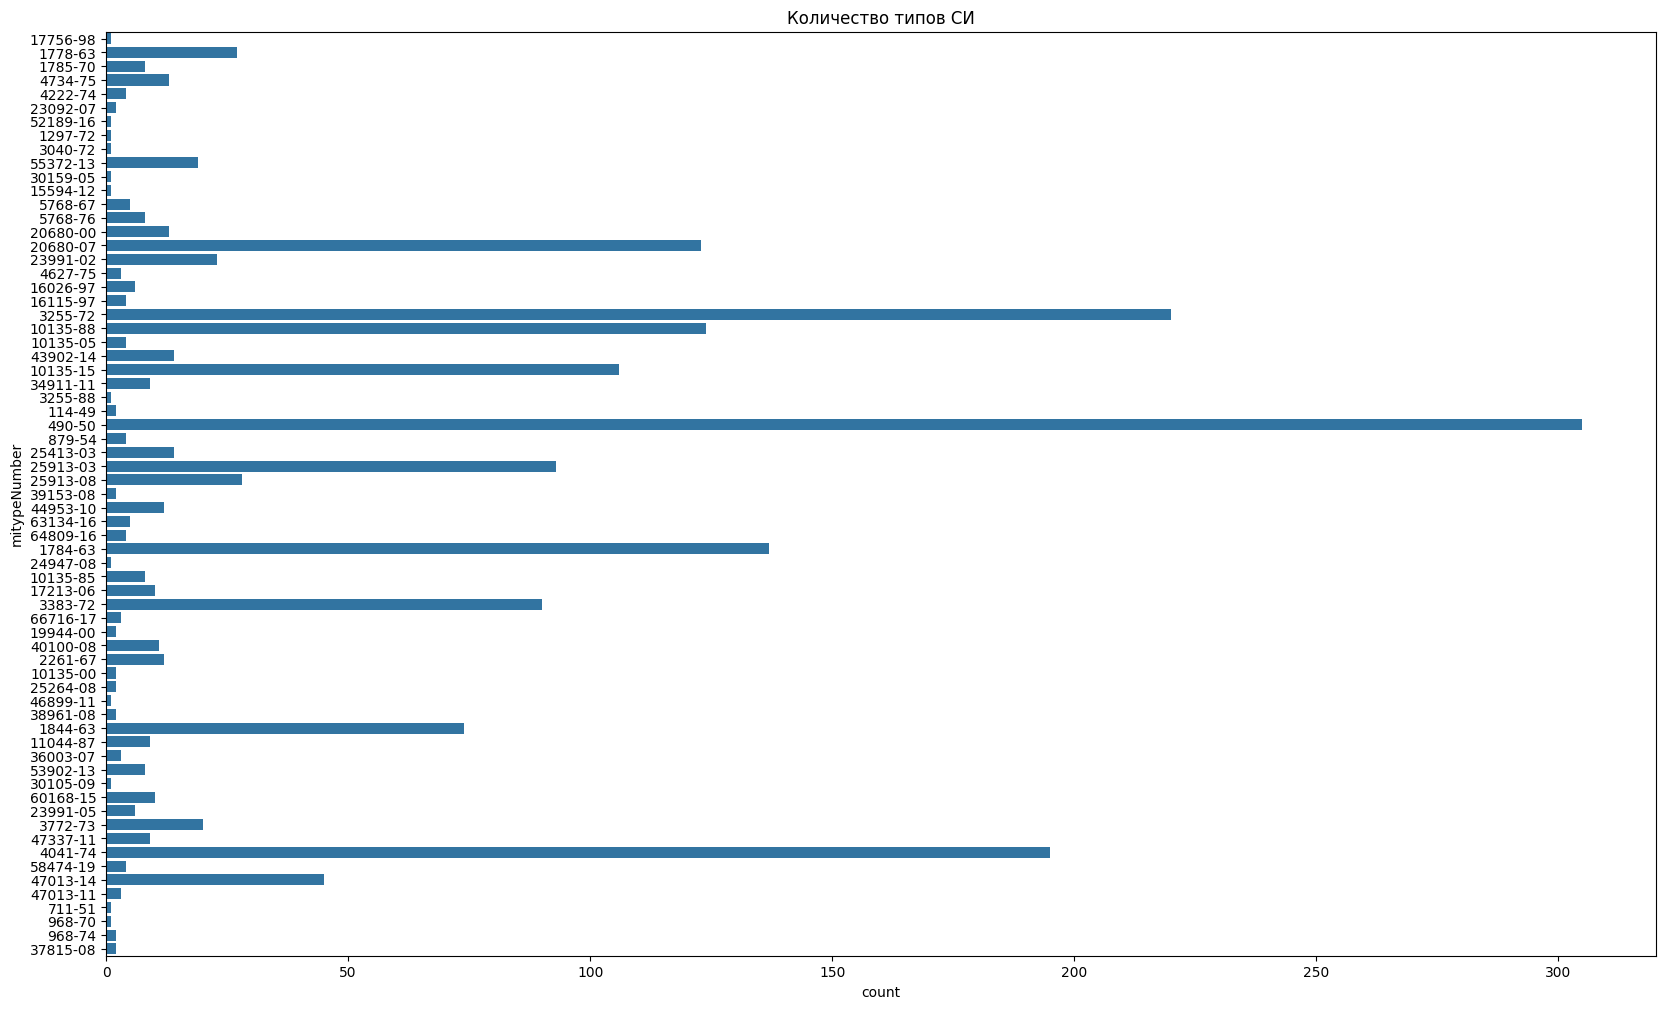

In [95]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.countplot(df1['mitypeNumber']).set_title('Количество типов СИ');

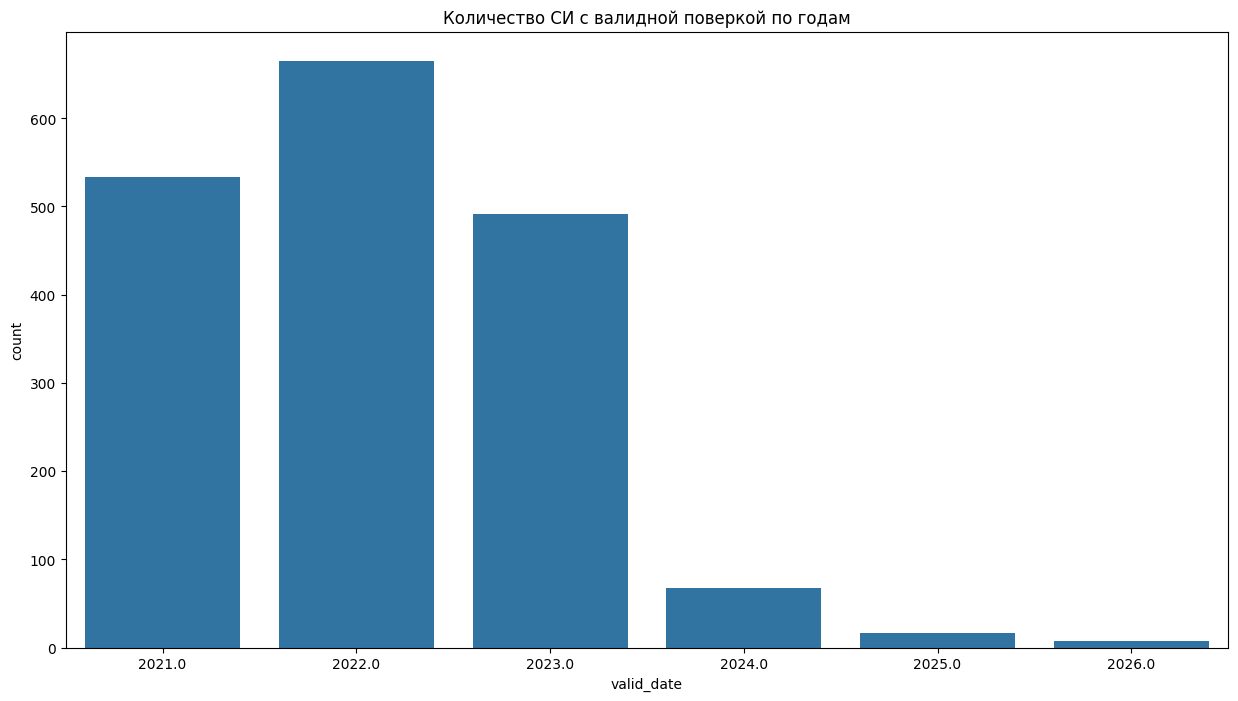

In [101]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df1.valid_date.dt.year).set_title('Количество СИ с валидной поверкой по годам');

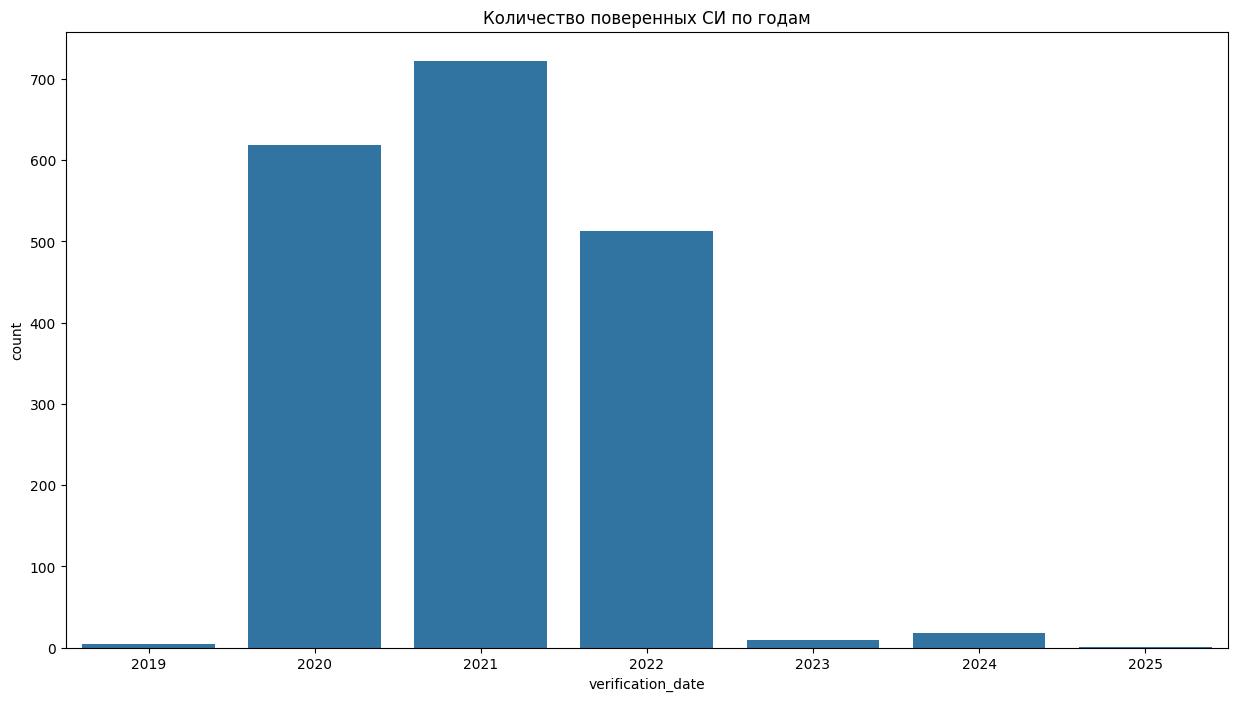

In [100]:
plt.figure(figsize=(15,8))
sns.countplot(x=df1.verification_date.dt.year).set_title('Количество поверенных СИ по годам');

Поверенные расходомеры в МАИ:

In [102]:
keys = {'regkey': 'd37e5f9c2df49556a580b1c3dc8dcc7a',
        'mi_Owner_name': 'МАИ',
        'mitypeTitle': 'расходомер',
        'export_type': '2'}
df2 = getData(url, keys)
df2.head()

,id,vri_id,mi_number,mi_modification,mi_manufactureYear,mi_signCipher,mi_Owner_name,org_title,fsa_ral_regNumbers_regNumber,mitypeNumber,...,mit_id,mitypeURL,mitypeType,verification_date,valid_date,publication_date,vriType,result_docnum,result_doc_type,additional_info
0,1,172632977,161954,Питер...,None,БЯ,МАИ+3Н,ФЕДЕР...,RA.RU...,46814-11,...,357947,https://fgis.gost.ru/fundmetrology/registry/4/...,Питер...,25.07.2022,24.07.2026,,Периодическая,C-БЯ/...,Извещение о непригодности,"0,25 л/имп"
1,2,172632978,154478,Питер...,None,БЯ,МАИ+3Н,ФЕДЕР...,RA.RU...,46814-11,...,357947,https://fgis.gost.ru/fundmetrology/registry/4/...,Питер...,25.07.2022,24.07.2026,,Периодическая,C-БЯ/...,Извещение о непригодности,"0,25 л/имп"
2,3,172632979,153857,Питер...,None,БЯ,МАИ+3Н,ФЕДЕР...,RA.RU...,46814-11,...,357947,https://fgis.gost.ru/fundmetrology/registry/4/...,Питер...,25.07.2022,24.07.2026,,Периодическая,C-БЯ/...,Извещение о непригодности,"0,25 л/имп"
3,4,172632981,164427,Питер...,None,БЯ,МАИ+3Н,ФЕДЕР...,RA.RU...,46814-11,...,357947,https://fgis.gost.ru/fundmetrology/registry/4/...,Питер...,25.07.2022,24.07.2026,,Периодическая,C-БЯ/...,Извещение о непригодности,"0,25 л/имп"
4,5,172632983,154157,Питер...,None,БЯ,МАИ+3Н,ФЕДЕР...,RA.RU...,46814-11,...,357947,https://fgis.gost.ru/fundmetrology/registry/4/...,Питер...,25.07.2022,24.07.2026,,Периодическая,C-БЯ/...,Извещение о непригодности,"0,25 л/имп"


In [103]:
df2.shape

(13, 28)

In [104]:
df2.to_csv('df2.csv')

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            13 non-null     int64 
 1   vri_id                        13 non-null     object
 2   mi_number                     13 non-null     object
 3   mi_modification               13 non-null     object
 4   mi_manufactureYear            0 non-null      object
 5   mi_signCipher                 13 non-null     object
 6   mi_Owner_name                 13 non-null     object
 7   org_title                     13 non-null     object
 8   fsa_ral_regNumbers_regNumber  13 non-null     object
 9   mitypeNumber                  13 non-null     object
 10  mitypeTitle                   13 non-null     object
 11  mit_owner_CountrySI           13 non-null     object
 12  mit_owner_SettlementSI        13 non-null     object
 13  mit_owner_Manufacturer

In [106]:
# преобразуем текстовые поля в даты:
for col in ['verification_date', 'valid_date']:
    df2[col] = pd.to_datetime(df2[col], dayfirst=True)

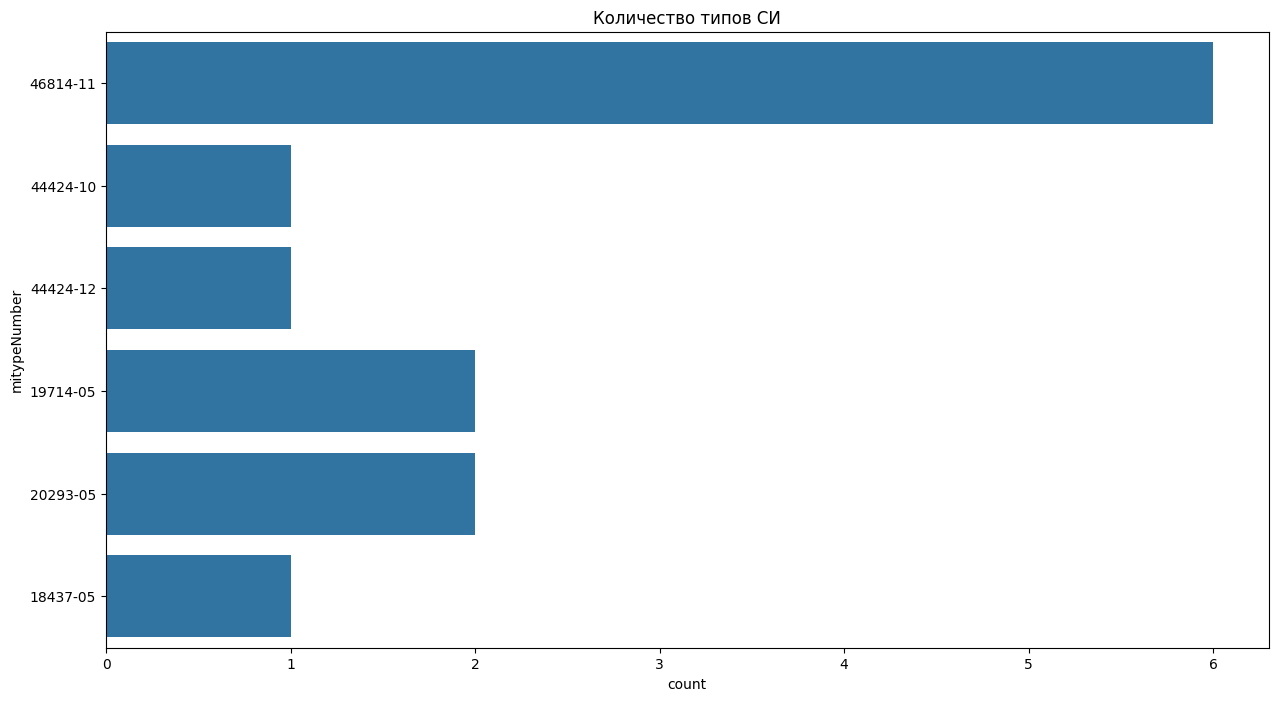

In [112]:
plt.figure(figsize=(15,8))
sns.countplot(df2['mitypeNumber']).set_title('Количество типов СИ');

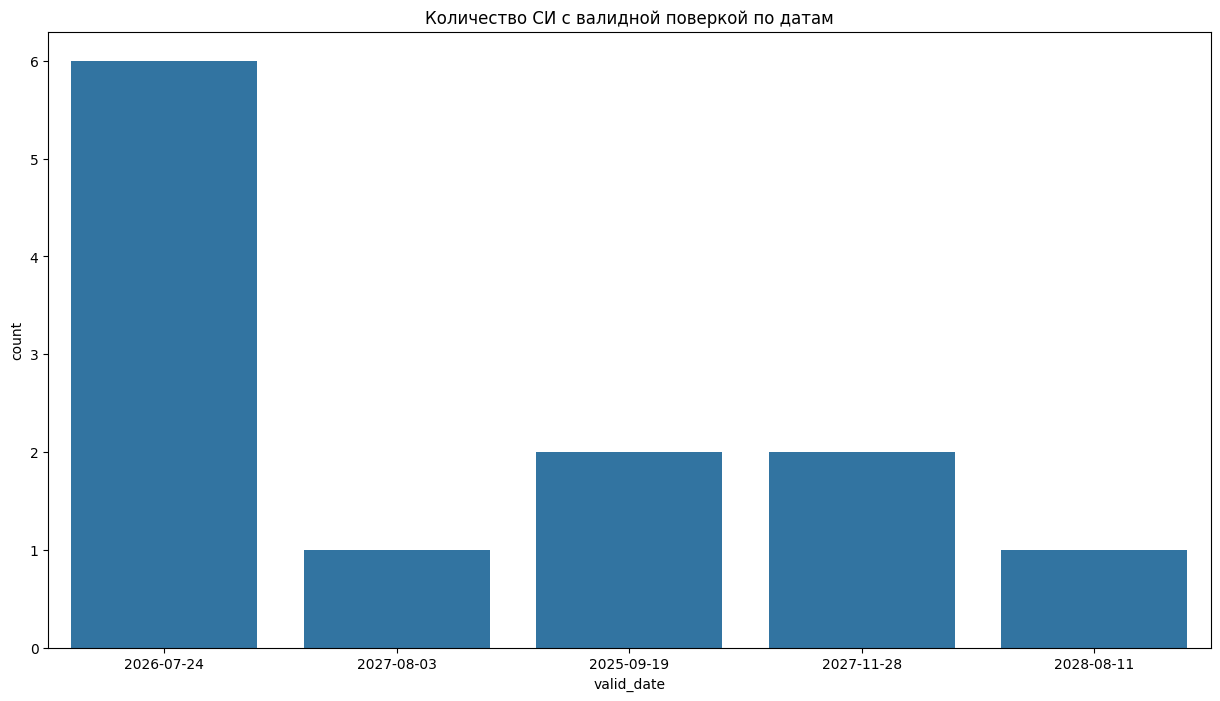

In [113]:
plt.figure(figsize=(15,8))
sns.countplot(x=df2['valid_date']).set_title('Количество СИ с валидной поверкой по датам');

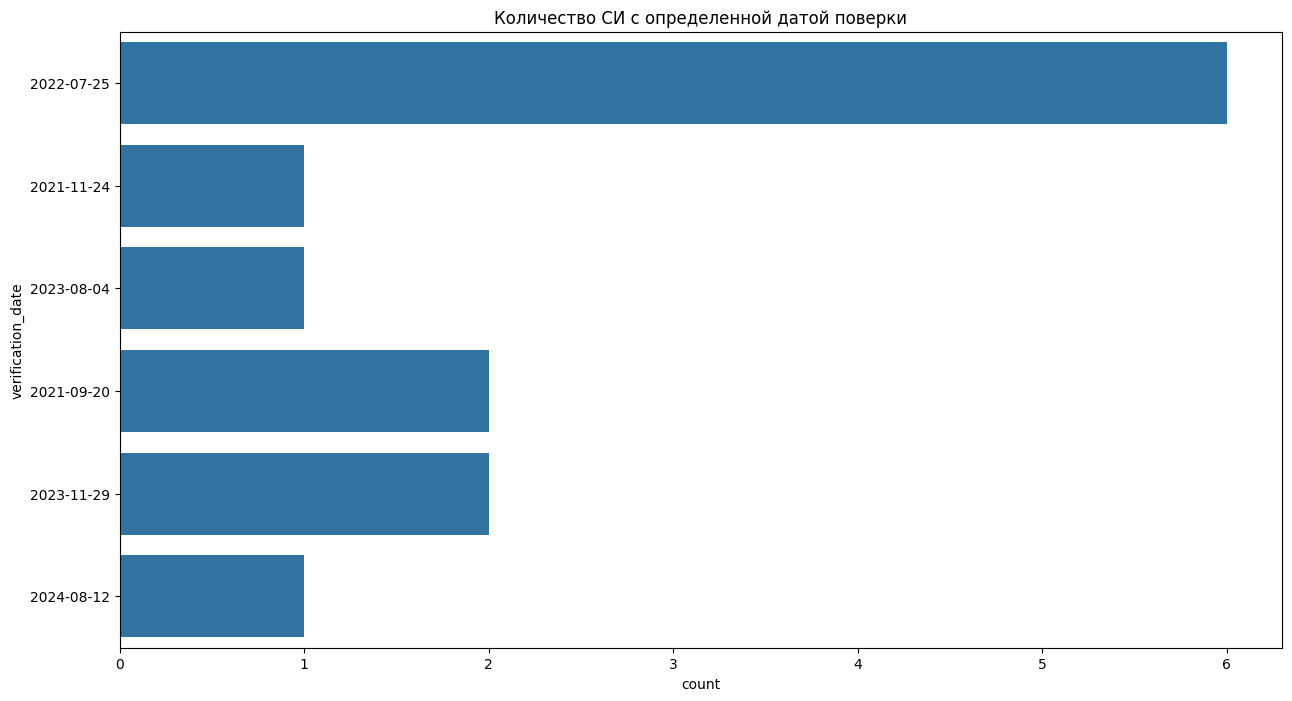

In [114]:
plt.figure(figsize=(15,8))
sns.countplot(df2['verification_date']).set_title('Количество СИ с определенной датой поверки');

Домашний счетчик

In [48]:
keys = {'regkey': 'd37e5f9c2df49556a580b1c3dc8dcc7a',
        'mi_number': '210721709',
        'export_type': '2'}
df3 = getData(url, keys)
df3.head()

,id,vri_id,mi_number,mi_modification,mi_manufactureYear,mi_signCipher,mi_Owner_name,org_title,fsa_ral_regNumbers_regNumber,mitypeNumber,...,mit_id,mitypeURL,mitypeType,verification_date,valid_date,publication_date,vriType,result_docnum,result_doc_type,additional_info
0,1,117936559,21072...,VLF-U...,2021,ДОЯ,ООО &...,ОБЩЕС...,RA.RU...,58362-20,...,1139866,https://fgis.gost.ru/fundmetrology/registry/4/...,VLF,15.12.2021,14.12.2027,,Первичная поверка,C-ДОЯ...,Извещение о непригодности,


In [49]:
df3.shape

(1, 28)